1 - Preparação dos dados

In [32]:
import pandas as pd             #importa a biblioteca pandas e a nomeia para pd
import seaborn as sns           #importa a biblioteca seaborn e a nomeia para sns
import matplotlib.pyplot as plt #importa a biblioteca matplotlib e a nomeia para plt
import numpy as np              #importa a biblioteca numpy e a nomeia para np


In [3]:
df = pd.read_csv("dados_produtos.csv") # df é uma variável que pega todos as informações da
# tabela dados_produtos.csv através do pd.read_csv

df.head() # mostra somente as primeiras linhas da variável df

,product_name,rating,rating_count,purchased
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1


2- Exploração dos dados

In [7]:
df.info() #exibe informações do dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  100 non-null    object 
 1   rating        100 non-null    float64
 2   rating_count  100 non-null    int64  
 3   purchased     100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB


In [6]:
df.describe() # fornece informações puramente descritivas sobre o conjunto de dados

,rating,rating_count,purchased
count,100.000000,100.000000,100.00
mean,4.056900,2536.670000,0.55
std,0.588344,1458.312544,0.50
min,3.020000,10.000000,0.00
25%,3.580000,1433.250000,0.00
50%,4.105000,2424.000000,1.00
75%,4.505000,3773.000000,1.00
max,5.000000,4977.000000,1.00


In [93]:
produtos = np.array(df["product_name"]) #pega todos os dados da coluna product_name e manda para a variavel produtos
rating = np.array(df["rating"])         #pega todos os dados da coluna rating e manda para a variavel rating
compras = np.array(df["purchased"])
rating_count = np.array(df['rating_count'])

In [94]:
rating

array([3.04, 3.46, 3.25, 3.77, 5.  , 3.98, 3.5 , 4.76, 3.94, 4.68, 4.43,
       3.14, 4.42, 3.14, 3.62, 4.1 , 3.93, 4.61, 4.18, 3.11, 4.24, 4.95,
       4.49, 3.6 , 4.92, 3.12, 4.89, 3.76, 3.76, 4.94, 3.02, 4.12, 3.23,
       4.45, 4.08, 4.  , 3.31, 3.04, 4.8 , 4.31, 3.82, 3.45, 3.05, 3.69,
       3.45, 4.98, 4.96, 3.75, 5.  , 3.39, 3.33, 4.95, 4.8 , 4.24, 4.97,
       4.23, 4.68, 3.51, 3.16, 4.99, 4.24, 3.49, 4.11, 4.68, 4.39, 3.71,
       4.55, 3.52, 4.47, 4.23, 4.01, 4.67, 3.79, 3.04, 3.44, 3.78, 3.87,
       3.69, 4.6 , 4.42, 3.38, 4.33, 3.81, 4.36, 4.29, 4.14, 4.12, 3.7 ,
       4.81, 3.84, 3.99, 4.64, 4.35, 4.15, 4.78, 4.44, 4.66, 4.33, 3.3 ,
       4.08])

Text(0.5, 0, 'Classes')

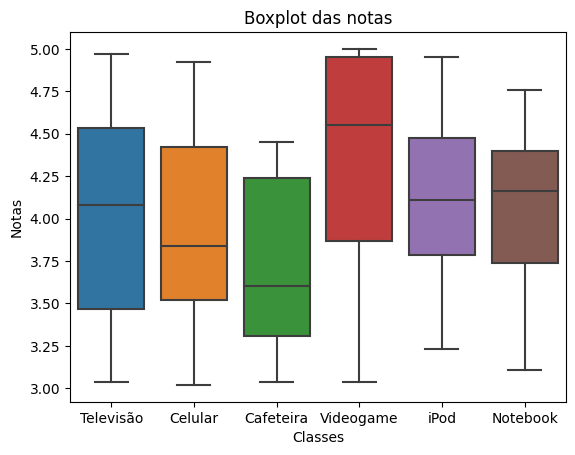

In [95]:
sns.boxplot(x = produtos, y = rating) #coloca as variaveis nas suas devidas funções, ou seja, x e y
plt.title('Boxplot das notas') #coloca o titulo
plt.ylabel('Notas')   #coloca o nome da sessão Y
plt.xlabel('Classes') #coloca o nome da sessão X

Essa linha acima cria os boxplots, através da biblioteca seaborn e a plotando com a matplotlib.

3 - Pré processamento dos dados

In [78]:
df.isnull().sum() # realizando a soma dos valores vazios e assim vendo se há algum vazio

product_name    0
rating          0
rating_count    0
purchased       0
dtype: int64

4 -Divisão do conjunto de dados em treinamento e teste

In [79]:
from sklearn.tree import DecisionTreeClassifier  #importa o "DecisionTreeClassifier" da biblioteca sklearn
from sklearn import tree #importa o "tree" da biblioteca sklearn

In [80]:
from sklearn.model_selection import train_test_split #utilizar o conjunto de dados train para treinar o modelo e, com um conjunto de dados nunca visto antes, o test,
#ver como o modelo lida com dados novos.

In [97]:
rating2 = df['rating_count']
rating3 = np.array(rating,rating2)

In [81]:

#dividir dados em teste e treino
rating_treino, rating_teste, produtos_treino, produtos_teste = train_test_split(rating3.reshape(-1,1),
                                                                            .reshape(-1,1), test_size=0.2, random_state=42)


In [82]:
modelo = DecisionTreeClassifier() #aqui cria o modelo da árvore de decisão
modelo.fit(rating_treino,produtos_treino)#aqui testa o modelo da árvore de decisão

DecisionTreeClassifier()

In [66]:
previsoes = modelo.predict(rating_teste) #indica que queremos aplicar as previsões na variável rating_teste

In [83]:
print(previsoes) #printa a variável "previsoes"

[1558 1435  245 1779 3299 1358 1989 1489 2463 4403 1311 4403 4403 1372
 1413 2986 3698 2385 2463  258]


5 - Criar modelo de Árvore de decisão

[Text(0.2849147121535181, 0.9736842105263158, '3.04 <= 4.98\ngini = 0.824\nsamples = 80\nvalue = [7, 15, 14, 15, 12, 17]\nclass = Celular'),
 Text(0.26785714285714285, 0.9210526315789473, '3.04 <= 4.955\ngini = 0.822\nsamples = 78\nvalue = [7, 15, 14, 15, 10, 17]\nclass = Celular'),
 Text(0.2507995735607676, 0.868421052631579, '3.04 <= 3.445\ngini = 0.822\nsamples = 76\nvalue = [7, 15, 14, 13, 10, 17]\nclass = Celular'),
 Text(0.1023454157782516, 0.8157894736842105, '3.04 <= 3.24\ngini = 0.796\nsamples = 14\nvalue = [4, 2, 3, 3, 1, 1]\nclass = Televisão'),
 Text(0.06823027718550106, 0.7631578947368421, '3.04 <= 3.045\ngini = 0.75\nsamples = 8\nvalue = [1, 2, 1, 3, 0, 1]\nclass = Televisão'),
 Text(0.0511727078891258, 0.7105263157894737, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0, 0]\nclass = Televisão'),
 Text(0.08528784648187633, 0.7105263157894737, '3.04 <= 3.195\ngini = 0.694\nsamples = 7\nvalue = [0, 2, 1, 3, 0, 1]\nclass = Televisão'),
 Text(0.06823027718550106, 0.6578947368

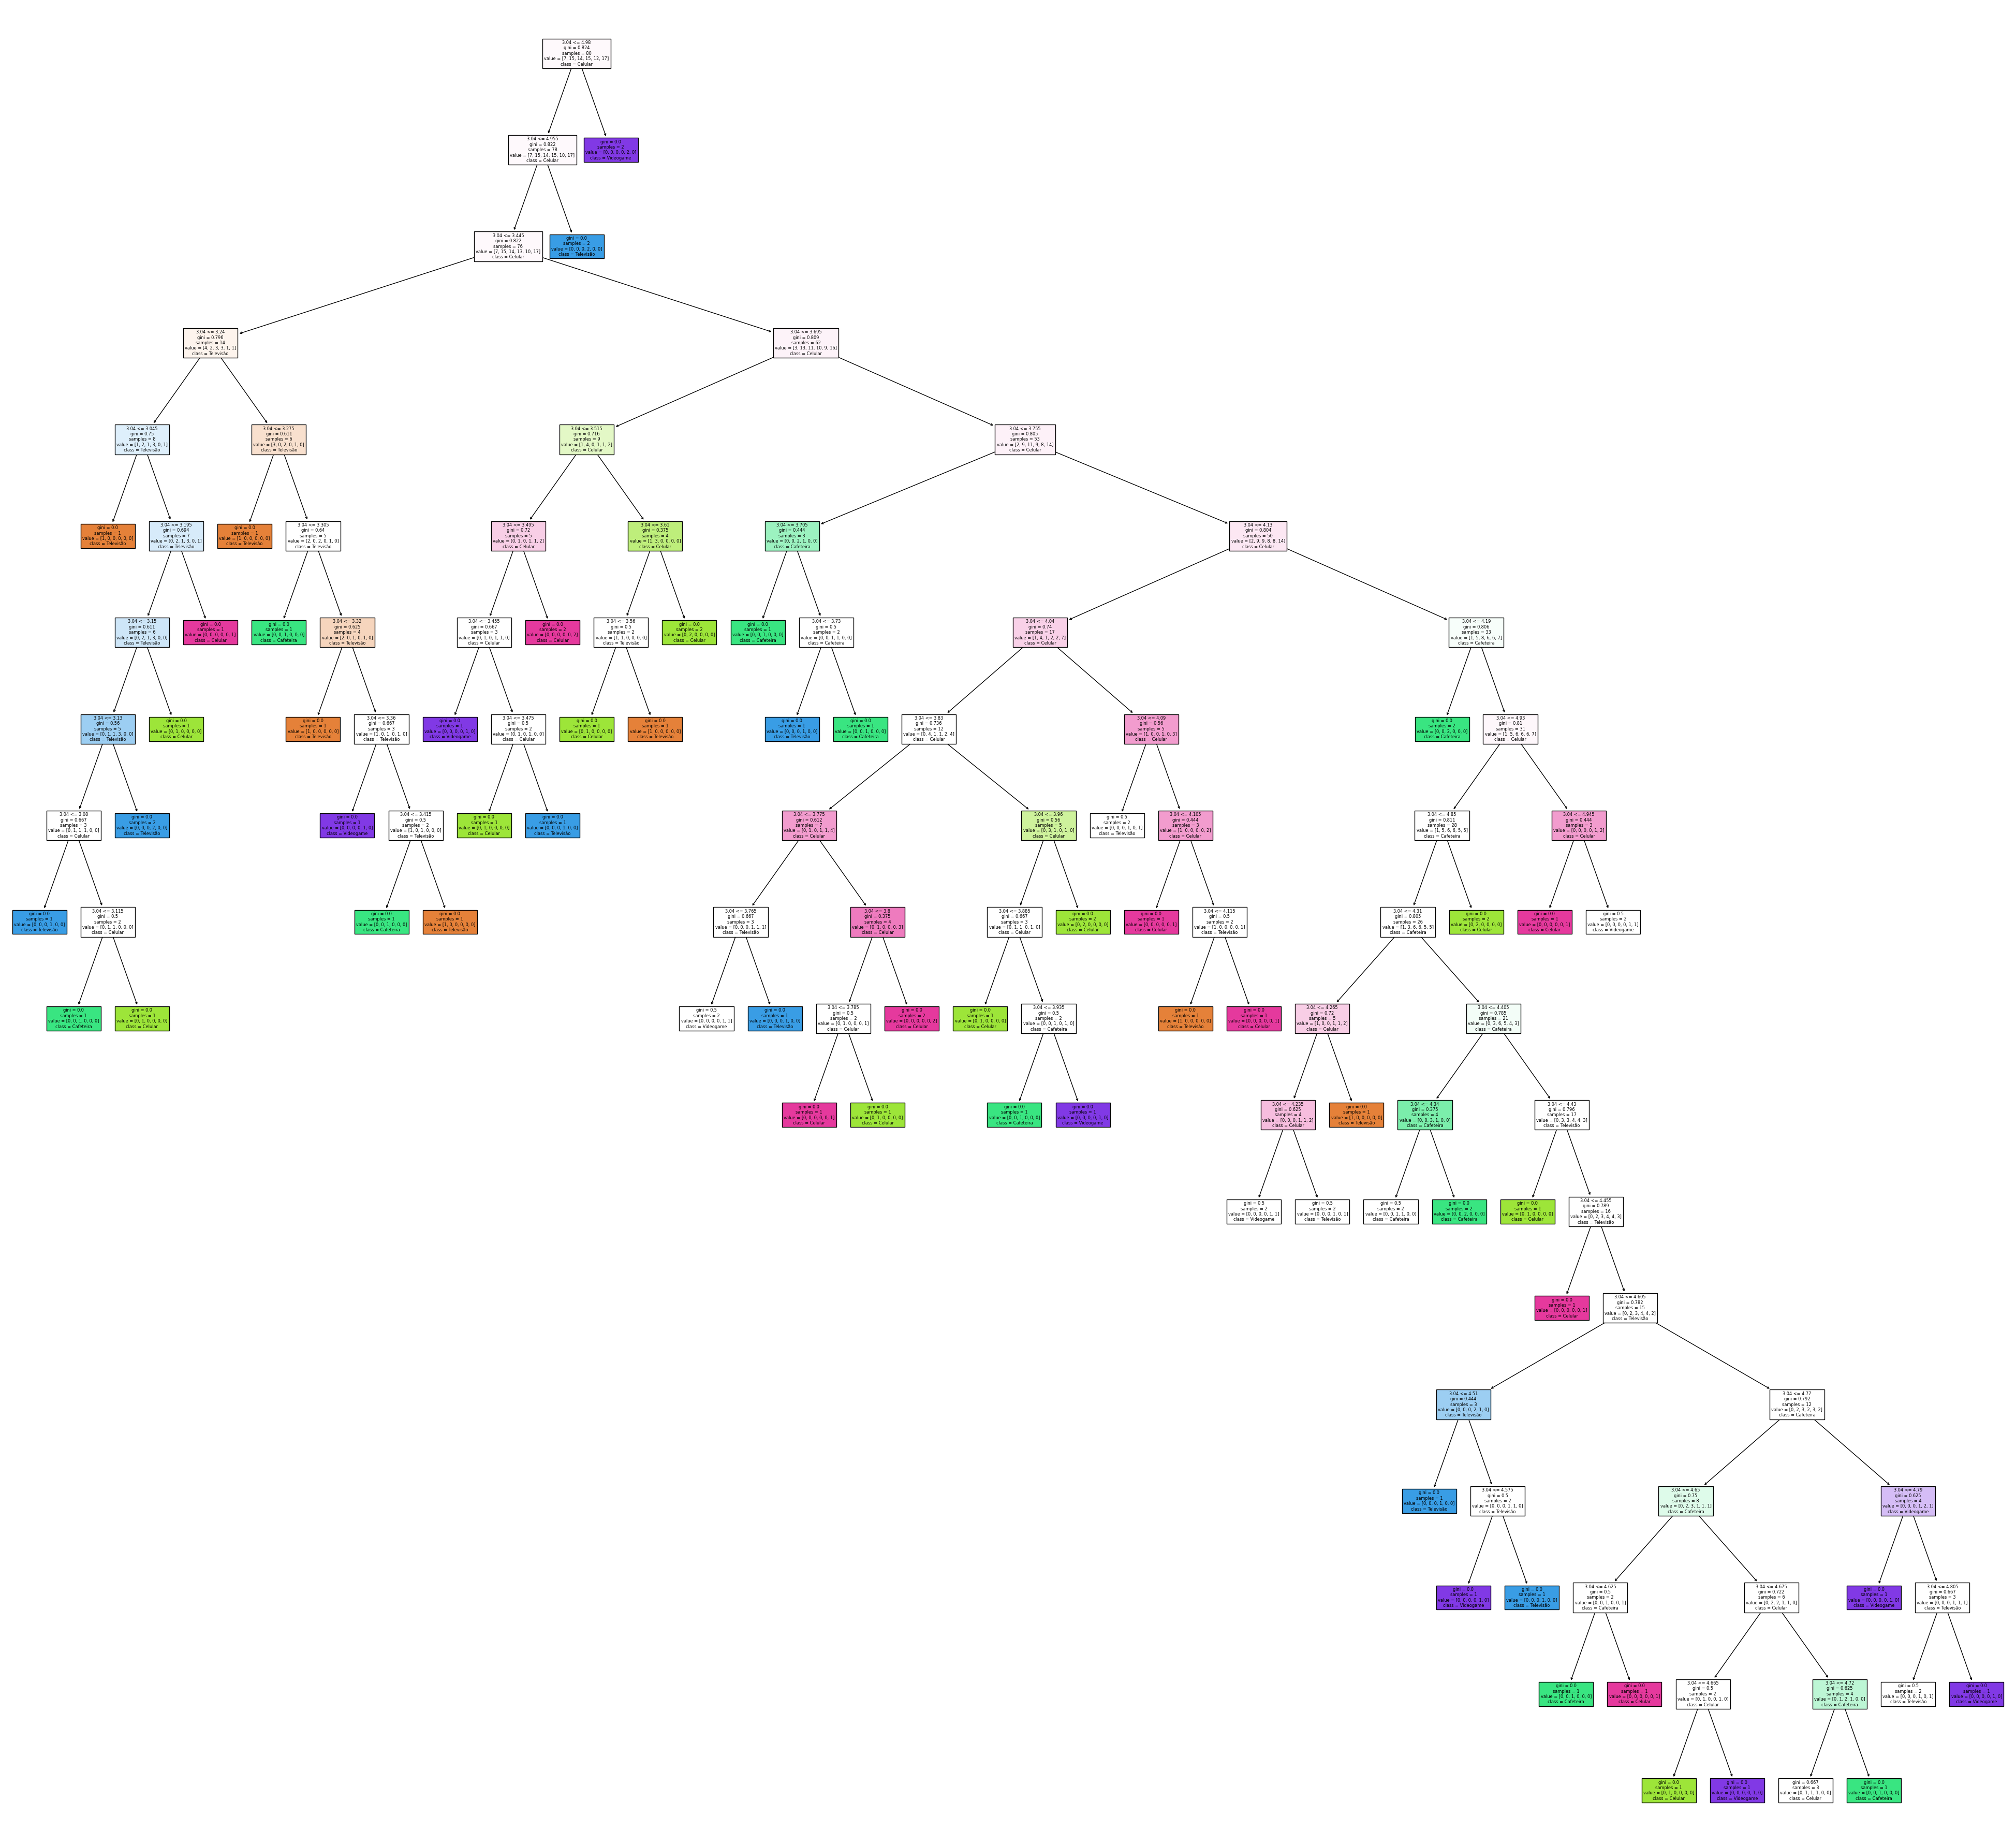

In [84]:
fig = plt.figure(figsize=(50,46))
tree.plot_tree(modelo,feature_names= rating.tolist(), class_names = produtos.tolist(), filled= True)

In [70]:
n_purchased = df['purchased'].count() #dados totais de compras e não compras
n_purchased

100

In [54]:
n_Compras = df['purchased'].sum() #dados de compras
n_Compras

55

In [55]:
n_nocompras = n_purchased - n_Compras #dados de nao compras
n_nocompras

45

In [56]:
df["purchased"].value_counts() #mostra a quantidade de dados divididos em compras(1) e não comprado(0)

purchased
1    55
0    45
Name: count, dtype: int64

0     False
1      True
2      True
3     False
4     False
      ...  
95     True
96    False
97    False
98    False
99     True
Name: purchased, Length: 100, dtype: bool

In [85]:
df['purchased'] = df['purchased'].map({0:'Não comprou',1:'comprou'})

In [87]:
df.head()

,product_name,rating,rating_count,purchased
0,Televisão,3.04,29,comprou
1,Celular,3.46,3872,Não comprou
2,Cafeteira,3.25,1187,Não comprou
3,Televisão,3.77,4097,comprou
4,Videogame,5.00,4738,comprou


não terminei